*  **Nama : Dika Wicaksono**
*   **NIM  : 21.11.4238**
*   **Kelas: 21-IF-06**

## 1. Import dan Install Library yang Diperlukan

In [1]:
#install library
%pip install pandas
%pip install scikit-learn
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#Import Library 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

## 2. Load Dataset

In [3]:
#Load dataset
df = pd.read_csv('./data/spam_dataset_2.csv')

# Pisahkan fitur dan label
y = df['label']
X = df['text']

## 3. Understanding Dataset

In [4]:
df.head(10)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
5,0,larry king live at escapenumber escapenumber p...
6,0,michael pobega wrote i'm not sure if it's the ...
7,0,hi i have this error tr sample escapenumber es...
8,1,works gateway world art explore tattooing full...
9,1,upon this account he is not only very cautious...


In [19]:
df.tail(10)

,label,text
83438,1,downloadable software ds is a fast paced compa...
83439,1,http printlost hk viagra escapenumber pills x ...
83440,0,howstuffworks r lifestyle april escapenumber e...
83441,1,lowest prices hbie qsxh gycj swlw swsszguohc z...
83442,0,tewk wrote patch was to large to attach so htt...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...
83447,1,get the most out of life ! viagra has helped m...


In [24]:
df.dtypes

label      int64
text      object
length     int64
dtype: object

In [25]:
df.describe()

,label,length
count,83448.000000,83448.000000
mean,0.526196,1662.952725
std,0.499316,4178.578068
min,0.000000,1.000000
25%,0.000000,449.000000
50%,1.000000,879.000000
75%,1.000000,1861.000000
max,1.000000,598705.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
 2   length  83448 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [27]:
# adding new column as length of the text
df['length'] = df['text'].apply(len)
df.head()

,label,text,length
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362


In [28]:
df['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

## 4. Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Number of Spam and Ham')

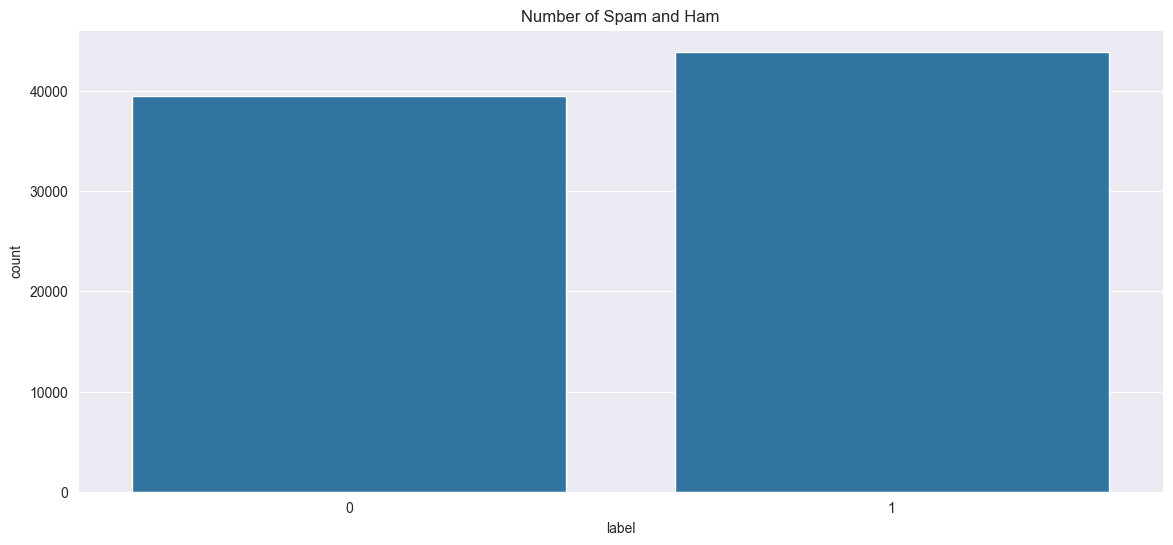

In [29]:
# plot for count of spam and ham in data
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(x='label',data=df)
plt.title('Number of Spam and Ham')

Text(0.5, 1.0, 'Length of Text')

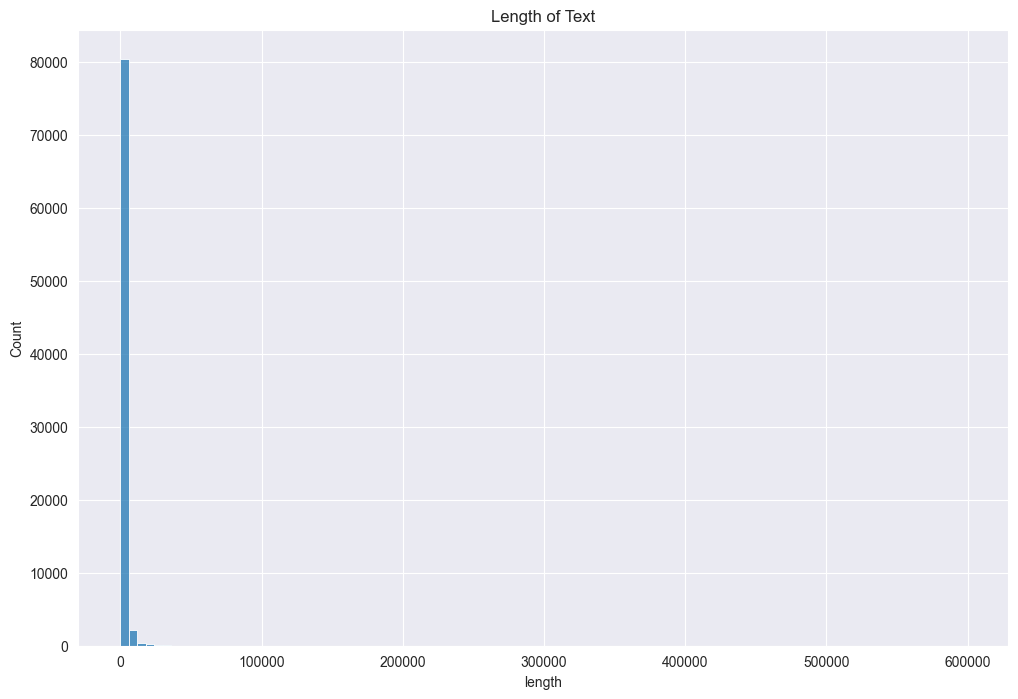

In [11]:
# Plot for distribution length of text
plt.figure(figsize=(12,8))
sns.histplot(x='length',data=df,bins=100)
plt.title('Length of Text')

In [12]:
# maximum length text 
df[df['length']==df['length'].max()]['text']

52108    commit a snapshot of the generated prototype h...
Name: text, dtype: object

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

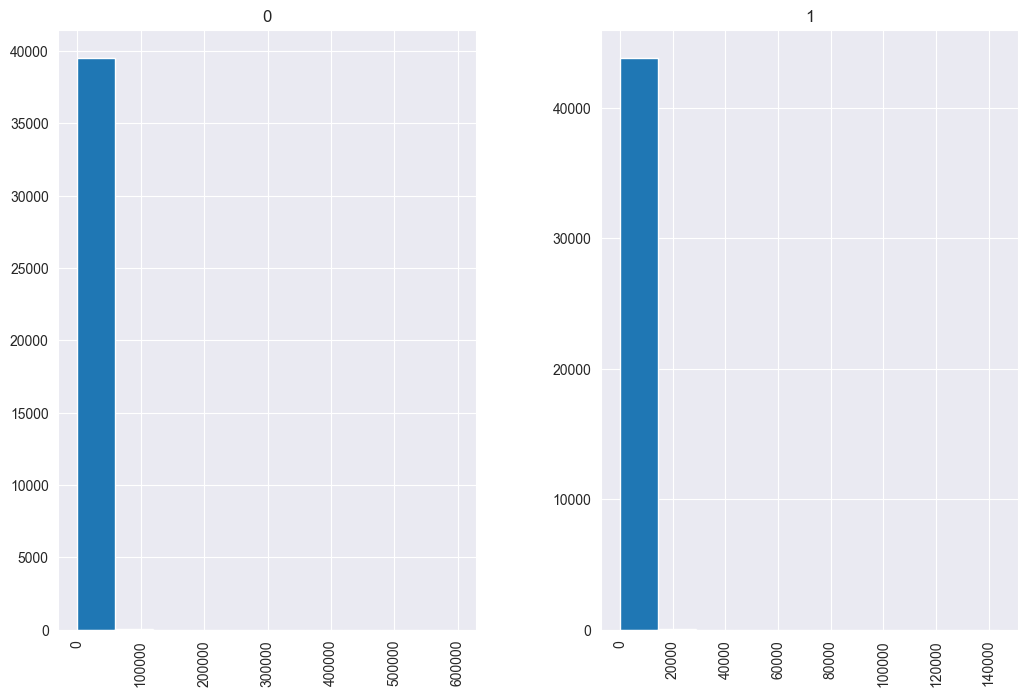

In [13]:
# distribution of spam and ham by length of text
df.hist(column='length',by='label',figsize=(12,8))

## 5. Feature Engineering

In [14]:
print(df['text'].apply(type).value_counts())

text
<class 'str'>    83448
Name: count, dtype: int64


In [15]:
#Preprocessing function
df['text'] = df['text'].astype(str)

In [16]:
df = df[df['text'].apply(lambda x: isinstance(x, str))]

In [17]:
def preprocess_text(text):
    # Remove punctuation
    tokens = word_tokenize(text)

    #Tokenization
    tokens = [token.lower() for token in tokens]


    tokens = [token for token in tokens if token.isalnum()]


    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]


    return ' '.join(tokens)


df['processed_text'] = df['text'].apply(preprocess_text)

In [18]:
#Vectorization
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'))
X = tfidf.fit_transform(df['processed_text'])
y = df['label']

## 6. Latih Model

In [19]:
# define X(features),y(target)
X=df['text']
y=df['label']

In [20]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:

# pipeline for Random Forest Classifier
pipe_svc =Pipeline([
    ('bow',CountVectorizer(analyzer=preprocess_text)),
    ('tf',TfidfTransformer()),
    ('classifier',SVC())
])

In [23]:
import pickle

pipe_svc.fit(X_train,y_train)

# Save the model
model_filename = './models/trained_model_2.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(pipe_svc, file)

In [25]:
model_filename = './models/trained_model_2.pkl'

# Load the model
with open(model_filename, 'rb') as file:
    pipe_svc = pickle.load(file)

# Make predictions
y_pred = pipe_svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Support Vector Machine (SVM) Performance:')
print(f'Accuracy: {accuracy:.2f}')

Support Vector Machine (SVM) Performance:
Accuracy: 0.82


In [28]:
# print confusion matrix and classification report
print ('Classification report on SVC:')
print('\n')
print(classification_report(y_test, y_pred))

Classification report on SVC:


              precision    recall  f1-score   support

           0       0.82      0.80      0.81     12983
           1       0.83      0.84      0.83     14555

    accuracy                           0.82     27538
   macro avg       0.82      0.82      0.82     27538
weighted avg       0.82      0.82      0.82     27538



Text(0.5, 1.0, 'Confusion Matrix for SVC')

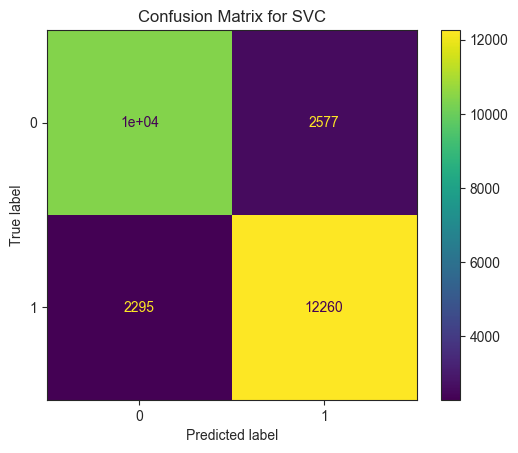

In [29]:
# Display confusion matrix for SVC

sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.title("Confusion Matrix for SVC")

## 7. Prediksi 

In [45]:
# Sample email text
sample_emails = """
Subject: Company Picnic This Weekend

Dear Team,

I am excited to remind everyone about our annual company picnic taking place this Saturday, July 7th, at Central Park from 10:00 AM to 4:00 PM.

Details:

Location: Central Park, Picnic Area B
Activities: BBQ, games, team-building exercises, and a raffle
What to Bring: Your family, sunscreen, hats, and a dish to share if you’d like
We will provide the main BBQ items, drinks, and some snacks. Feel free to bring any special dishes or desserts to share with your colleagues. This is a great opportunity to relax, have fun, and get to know each other better outside of the office.

Looking forward to seeing you all there!

Best regards,

John Doe
HR Manager
Meta Corporation

"""

# Function to predict if an email is spam or not
def predict_email(email_text):
    email_text = [email_text]
    prediction = pipe_svc.predict(email_text)
    return 'spam' if prediction[0] == 1 else 'ham'

# Predict if the sample email is spam or not
prediction = predict_email(sample_emails)
print(f'The email is {prediction}')

The email is ham
